<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/main_SequentialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv", nrows=1000000)
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv", nrows=200000)

In [4]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [5]:
# distribuição das targets

print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    499989
bruteforce    100197
slowite       100188
malformed     100067
dos            99869
flood          99690
Name: count, dtype: int64
target
legitimate    100109
flood          20060
bruteforce     20055
malformed      20037
slowite        19886
dos            19853
Name: count, dtype: int64


In [6]:
'''
'rows' e o vetor que sera usado para acumular as linhas que serao excluidas a fim de balancear
as targets
'''
rows_train = []
rows_test = []

for i in train.index:
    if train['target'][i] == 'legitimate':
        rows_train.append(i)

for i in test.index:
    if test['target'][i] == 'legitimate':
        rows_test.append(i)

In [7]:
# aqui, e feita a leitura da diferenca para igualar os valores

rows_train = rows_train[:399989]
rows_test = rows_test[:80000]

In [8]:
# atualizacao e igualacao dos valores

train = train.drop(rows_train)
test = test.drop(rows_test)

print("Dados de treino: ", train['target'].value_counts())
print("Dados de teste: ", test['target'].value_counts())

Dados de treino:  target
bruteforce    100197
slowite       100188
malformed     100067
legitimate    100000
dos            99869
flood          99690
Name: count, dtype: int64
Dados de teste:  target
legitimate    20109
flood         20060
bruteforce    20055
malformed     20037
slowite       19886
dos           19853
Name: count, dtype: int64


In [9]:
# pre processamento de dados
# separacao de features e targets

X_train = train.iloc[:,:-1]
y_train = train['target']

X_test = test.iloc[:,:-1]
y_test = test['target']

print(X_train.shape)
print(X_test.shape)

(600011, 33)
(120000, 33)


In [10]:
# transformacao de targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [11]:
label.fit(y_train)
label.fit(y_test)

LabelEncoder()

In [12]:
list(label.classes_)

['bruteforce', 'dos', 'flood', 'legitimate', 'malformed', 'slowite']

In [13]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)

In [14]:
# ajuste de dados

# 'columns' sao as features com valores irrelevantes para o treinamento

columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg']

# features = features.drop(columns, axis=1)

X_train = X_train.drop(columns, axis=1)
X_test = X_test.drop(columns, axis=1)


print(X_train.shape)
print(X_test.shape)

(600011, 19)
(120000, 19)


In [15]:
# ajuste de variáveis categóricas

# features = pd.get_dummies(features)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print(X_train.shape)
print(X_test.shape)

(600011, 44)
(120000, 44)


In [16]:
# 'col' sao as features categoricas com valores True/False

col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [17]:
# substituicao dos valores True/False por 1/0 respectivamente

# features[col] = features[col].replace({True: 1, False: 0})

X_train[col] = X_train[col].replace({1: True, 0: False})
X_test[col] = X_test[col].replace({1: True, 0: False})

In [18]:
# features = features.values

X_train = X_train.values
X_test = X_test.values

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# normalização dos dados
# seleção de features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=30)

pca.fit(X_train)
pca.fit(X_test)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [20]:
# embaralhamento de dados

# from sklearn.model_selection import train_test_split

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, random_state=0)

In [22]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [23]:
# sequential model

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000)

Epoch 1/200
601/601 - 5s - loss: 0.9650 - accuracy: 0.5843 - val_loss: 0.8714 - val_accuracy: 0.6089 - 5s/epoch - 8ms/step
Epoch 2/200
601/601 - 3s - loss: 0.8685 - accuracy: 0.6061 - val_loss: 0.8630 - val_accuracy: 0.6093 - 3s/epoch - 6ms/step
Epoch 3/200
601/601 - 4s - loss: 0.8636 - accuracy: 0.6066 - val_loss: 0.8596 - val_accuracy: 0.6111 - 4s/epoch - 6ms/step
Epoch 4/200
601/601 - 5s - loss: 0.8600 - accuracy: 0.6077 - val_loss: 0.8683 - val_accuracy: 0.5906 - 5s/epoch - 8ms/step
Epoch 5/200
601/601 - 4s - loss: 0.8581 - accuracy: 0.6083 - val_loss: 0.8580 - val_accuracy: 0.6124 - 4s/epoch - 7ms/step
Epoch 6/200
601/601 - 3s - loss: 0.8565 - accuracy: 0.6089 - val_loss: 0.8538 - val_accuracy: 0.6110 - 3s/epoch - 5ms/step
Epoch 7/200
601/601 - 3s - loss: 0.8556 - accuracy: 0.6085 - val_loss: 0.8539 - val_accuracy: 0.6110 - 3s/epoch - 5ms/step
Epoch 8/200
601/601 - 5s - loss: 0.8546 - accuracy: 0.6086 - val_loss: 0.8518 - val_accuracy: 0.6110 - 5s/epoch - 8ms/step
Epoch 9/200
601/

In [25]:
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

3750/3750 [==============================] - 4s 1ms/step
Matriz de Confusão:
[[ 8584     0  7597     0     3  3871]
 [    3 14327  5512     0     2     9]
 [    0     0 19883    70     0   107]
 [    0     0  7506 12598     5     0]
 [ 1683    73  5307  1273  6894  4807]
 [   19     0  8662     0     3 11202]]


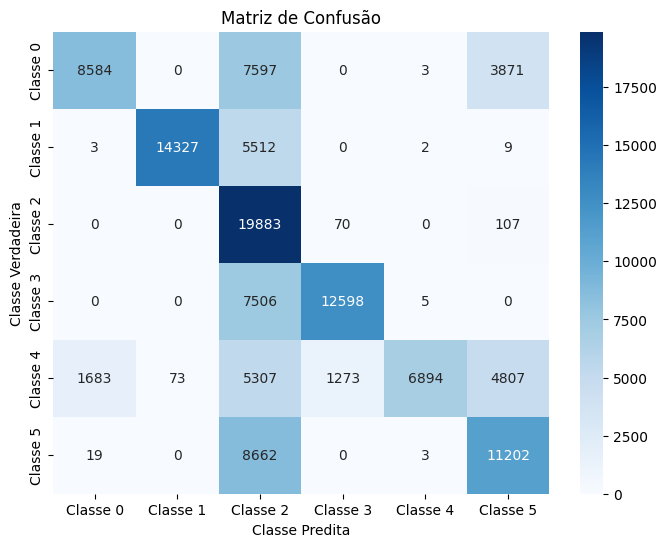

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])],
            yticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

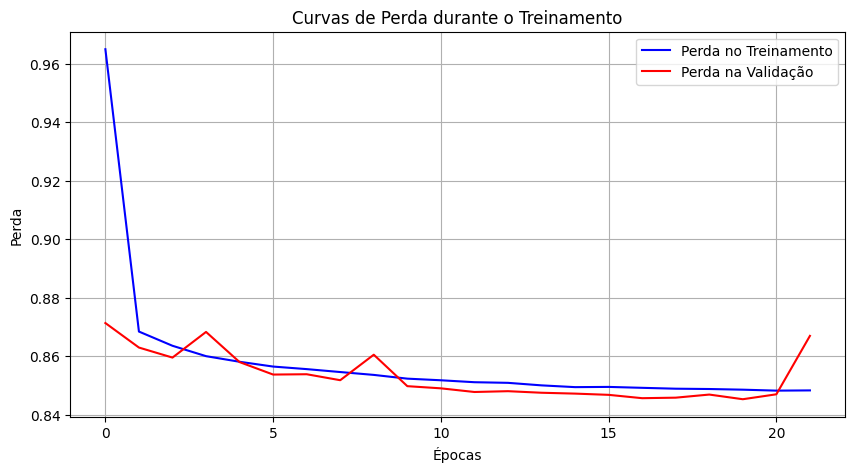

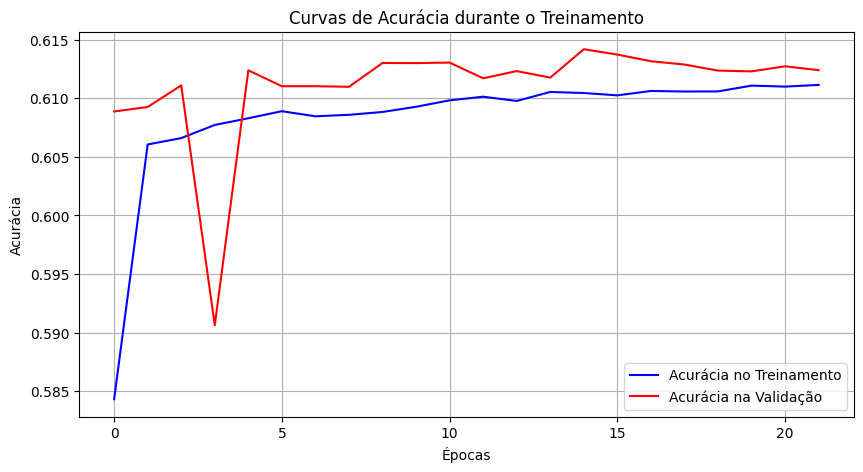

In [27]:
import matplotlib.pyplot as plt

# Acessar os valores de perda e acurácia durante o treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotar as curvas de perda
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Perda no Treinamento', color='blue')
plt.plot(val_loss, label='Perda na Validação', color='red')
plt.title('Curvas de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# Plotar as curvas de acurácia
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Acurácia no Treinamento', color='blue')
plt.plot(val_accuracy, label='Acurácia na Validação', color='red')
plt.title('Curvas de Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()